<img align="left" src="https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png" width="1000px"/><br><br><br><br>


# QML (Quantum Machine Learning)

Created: 2022/10/30

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img aling="left" alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />License: <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional</a>.
Internal Reviewers:
* Alba Cervera ([BSC](https://www.bsc.es/))

Authors:
* Carmen Calvo ([SCAYLE](https://www.scayle.es/))
* Antoni Alou ([PIC](https://www.pic.es/))
* Carlos Hernani ([UV](https://www.uv.es/))
* Nahia Iriarte ([NASERTIC](https://www.nasertic.es/es))
* Carlos Luque ([IAC](https://www.iac.es/))


Consulta la notación que se ha utilizado durante todo el documento en el siguiente [enlace](#notacion).

# 3. Variational Quantum Classifier (VQC)

Existen múltiples métodos para clasificar un conjunto de datos utilizando un ordenador cuántico. Uno de ellos es el algoritmo conocido como **Variational Quantum Classifier** o **VQC**, que pertenece a la categoría de algoritmos cuánticos variacionales (VQA).

El VQC es un algoritmo de aprendizaje supervisado que hace uso de un circuito cuántico variacional. El circuito cuántico variacional, también llamado circuito cuántico parametrizado, realiza una función similar a la arquitectura de una red neuronal clásica. Siguiendo con la analogía de la red neuronal clásica, en este circuito, cada puerta cuántica parametrizada equivale a lo que sería un nodo en una red clásica, y los parámetros que gobiernan estas puertas equivalen a los pesos en una red.

Al igual que el aprendizaje automático clásico, el algoritmo VQC tiene una fase de entrenamiento, en la que se proporcionan datos etiquetados, y una fase de validación, en la que se clasifican nuevos datos con el modelo ya entrenado para así evaluar la calidad del modelo [[1]](#referencias). Se trata de un algoritmo de clasificación híbrido, ya que combina una componente cuántica y una componente clásica, tal y como se aprecia en la **Imagen 1**, que realiza un bucle de optimización de los parámetros clásicos del circuito cuántico.

Comienza con la componente cuántica. En esta fase se lleva a cabo el preprocesamiento de los datos, la preparación de los estados cuánticos y se ejecuta el circuito correspondiente al algoritmo. Una vez se completa la primera fase, el algoritmo hace uso de la componente clásica. Esta última ajusta la función de coste y actualiza los parámetros en función de la salida obtenida en el circuito.

<center><img src=https://raw.githubusercontent.com/born-2learn/born-2learn.github.io/master/_posts/images/vqc-part1/qml-workflow.png width="400"></center>

<center>Imagen 1. Etapas del algoritmo QML [5]</center>

Ambas fases se llevan a cabo de forma iterativa, es decir, los valores de los parámetros se actualizan con los obtenidos en la componente clásica y se inicia de nuevo el proceso con la finalidad de obtener la mejor solución.


<a id='VariationalQuantumCirc'></a>
## 3.1. Variational Quantum Circuit

Los circuitos cuánticos variacionales o parametrizados son circuitos que dependen de parámetros configurables y que se optimizan mediante un coprocesador clásico para realizar una tarea determinada.

En general, todo circuito variacional se divide en tres pasos:

1. **Preparación de datos (*State Preparation*)**: El primer paso en cualquier proceso de aprendizaje automático cuántico es trasladar los datos de tu problema clásico a estados cuánticos dentro de tu espacio de Hilbert. Al hacer este proceso, es importante tener en cuenta que para clasificar correctamente los datos, debemos introducir no linealidad en el proceso, ya que el circuito cuántico es lineal en el espacio de Hilbert. Esta no linealidad se puede introducir de diferentes formas, una de ellas es mediante un preprocesamiento clásico de los datos o mediante las puertas cuánticas que transformarán estos datos clásicos en características cuánticas de nuestro estado. Este proceso se conoce como mapeado de características cuántico (*Quantum Feature Map*); es el encargado de traducir nuestro problema clásico a un problema que nuestro circuito cuántico pueda tratar. A este paso también se le conoce como *quantum embedding* o *data encoding*. Para obtener más información sobre estas técnicas, puede consultar el siguiente [enlace](2_Feature_encoding.ipynb).

2. **Circuito parametrizado**: El circuito diseñado para realizar una tarea concreta, por ejemplo, clasificación, está caracterizado por un operador unitario parametrizado $U(x, \theta)$. Donde $x$ es la entrada del circuito (los datos codificados anteriormente) y $\theta$ son los parámetros variacionales. Este operador unitario está compuesto por diferentes capas de puertas cuánticas; la arquitectura para definir una capa puede cambiar según el problema y debe adaptarse para cada caso. También existen variantes más sofisticadas del VQC que combinan la arquitectura de capas con el mapeado de características, las cuales se discutirán más adelante.

3. **Medida/Optimización**: En esta etapa, se ejecuta el circuito y se mide repetidamente para obtener el valor esperado de un observable. Con este valor esperado, se intenta inferir la etiqueta que correspondía al dato codificado. A partir de esta medida, se calcula una función de coste y sus gradientes para poder optimizar los parámetros que caracterizan el circuito y repetir el proceso. Con suficientes iteraciones y si todo va bien, los pesos de las puertas estarán optimizados para clasificar el conjunto de datos con el que se haya entrenado [[2]](#referencias).



<a id='Ejemplo'></a>
## 3.2. Data reuploading classifier

La tecnica del data reuploading para classificaion quantica en circuitos quanticos fue introducida en [[3]] y tiene la ventaja que introduce no linealidad en el sistem de manera nativa. El algoritmo consiste en aplicar el feature encoding de mnera repetida al principio de cada layer. De esta manera con un feature encoding sencillo y repitiendolo en cada layer se pueden resolver problemasde classificacion no lineales con muy pocas capas.

Fotico

<a id='Ejemplo'></a>
## 3.3. Ejemplos de aplicación

<a id='Ejemplo'></a>
### 3.3.1 VQC

A continuación, se presenta un ejemplo básico que demuestra el uso de un clasificador cuántico variacional. Como conjunto de datos de ejemplo, utilizaremos el conjunto de datos "two moons" incluido en la librería scikit-learn. Este conjunto de datos no se puede clasificar de manera lineal y nos ayudará más adelante a observar cómo introducir diferentes fuentes de no linealidad en el circuito variacional.

Primero cargamos la librería y las herramientas necesarias.

A continuación observamos el set de datos

In [1]:
import numpy as np
import qibo
import matplotlib.pyplot as plt
from qibo import callbacks, gates, hamiltonians, models
from qibo.symbols import Y, Z, I
from sklearn.datasets import make_moons
from qibo.models import Circuit

import tensorflow as tf


2023-11-28 16:29:10.366850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 16:29:10.491505: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
print(tf.__version__)

2.11.1


In [3]:
qibo.set_backend("tensorflow")

[Qibo 0.1.13|INFO|2023-11-28 16:29:14]: Using tensorflow backend on /device:GPU:0
2023-11-28 16:29:14.291886: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8849 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:b1:00.0, compute capability: 7.5


In [4]:
nclasses=2
measured_qubits= int(np.ceil(np.log2(nclasses)))
nqubits=2
nlayers=3
nshots=10000

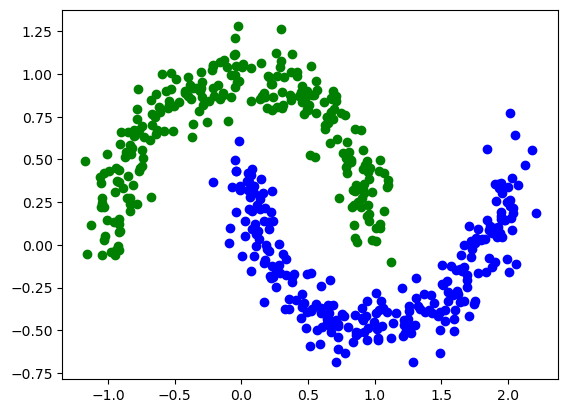

In [29]:
num_inputs = 2
num_samples = 500
X,y=make_moons(num_samples,noise=0.1)
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.show()

Vamos a empezar con un poco de preprocesamiento clásico. Observamos que los datos varían de -1 a 2. Teniendo en cuenta que más adelante los codificaremos en los ángulos de una rotación, vamos a reescalarlos para que estén en el rango de -1 a 1 y los vamos a centrar. Además, vamos a duplicar los datos, lo cual nos ayudará más tarde al pasarlos al circuito.

In [6]:
def procesdata(data):
    data=np.array(data)
    Min=data.min(axis=0)
    Max=data.max(axis=0)
    data=(2*data-Max-Min)/(Max-Min)
    one=np.ones((len(data),2))
    data_p=np.repeat(data, 2,axis=1)#np.c_[data,data]
    return data_p

Ahora vemos comoeste preprocesamiento a modificado nuestros datos

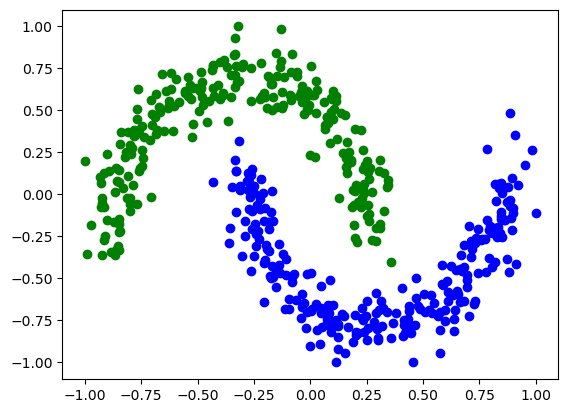

In [25]:
X_pad=procesdata(X)
Y = 2*y -np.ones(len(y))
for x, y_target in zip(X_pad[:,[0,2]], y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.show()

Separamos el set de entrenamiento de el de validación

In [8]:
num_data = len(Y)
num_train = int(0.80 * num_data)
index = np.random.permutation(range(num_data))
Y_train = Y[index[:num_train]]
Y_val = Y[index[num_train:]]
X_train = X_pad[index[:num_train]]
X_val = X_pad[index[num_train:]]

Definimos el ansatz de las capas del VQC que utlizaremos para contruir el circuito

In [9]:
def create_circuit(w,x, nqubits= 2,nlayers=nlayers):
    
    c= Circuit(nqubits=nqubits)

    c.add(gates.RY(q=0, theta = w[0]*x[0]+w[4]))
    c.add(gates.RY(q=1, theta = w[1]*x[1]+w[5]))
    
    c.add(gates.RZ(q=0, theta = w[2]*x[2]+w[6]))
    c.add(gates.RZ(q=1, theta = w[3]*x[3]+w[7]))
    
    for i in range(nlayers):
        j=7+i*4
        c.add(gates.RY(q=0, theta = w[j+1]))
        c.add(gates.RY(q=1, theta = w[j+1]))
     
        c.add(gates.CZ(0,1))
    
        c.add(gates.RY(q=0, theta = w[j+3]))
        c.add(gates.RY(q=1, theta = w[j+4]))
    
    # Última rotación
    c.add(gates.RY(q=0, theta = w[j+5]))
    c.add(gates.RY(q=1, theta = w[j+6]))
    
    c.add(gates.M(0))
    
    return c

Hora definimos las fucniones que vamos a necesitar durante el entrenamiento. La fucnión Classifier circuit que definimos a continuació se encarga de asignar a los parametros del circuito si corresponden a dato o a pesos (data,theta). Otra cosa a notar en esta función es que en vez de introducir $x_i$ en las primeras puertas correspondiente a los datos introducimos $x_i*\theta_i + \theta_{i+4}$ esto es facil ver que no afectara a los datos introducido y facilita el entrenamineto con qibo.

In [10]:
 def Classifier_circuit(theta,data,nqubits=2):
    """
    Args:
        theta: list or numpy.array with the biases and the angles to be used in the circuit
        nlayers: int number of layers of the varitional circuit ansatz
        RY: if True, parameterized Rx,Rz,Rx gates are used in the circuit
            if False, parameterized Ry gates are used in the circuit (default=False)
    Returns:
        Circuit implementing the variational ansatz for angles "theta"
    """

    #bias = np.array(theta[0 : measured_qubits])
#     theta = theta.numpy()
#     print('shape',data.shape)
#     theta[measured_qubits : measured_qubits+4]=data*theta[measured_qubits : measured_qubits+4]+theta[measured_qubits+4 : measured_qubits+8]
#     angles = theta.numpy()
#     angles = theta[measured_qubits :]
#     angles[0:4]=data*angles[0:4]+angles[4:8]
#     theta = tf.Variable(theta)
#     print(theta)
    circ = create_circuit(theta,data, nqubits)
#     circ.set_parameters(angles)
#     print(circ.draw())
    return circ

La siguente funcion "Predictions" computa los valores esperados de cada observable para cada dato cada dato.

In [11]:
# defining an observable
def hamiltonian(nqubits):
    if nqubits==1:
        Obj=Z(0)
    else:
        Obj = np.kron( Z(0), I(1))
    h = hamiltonians.SymbolicHamiltonian(Obj)
    return h

In [12]:
def Predictions(data, theta, nqubits, nshots=10000,R=False):
    """
    Args:
        theta: list or numpy.array with the biases to be used in the circuit
        init_state: numpy.array with the quantum state to be classified
        nshots: int number of runs of the circuit during the sampling process (default=10000)
    Returns:
        numpy.array() with predictions for each qubit, for the initial state
    """
    if R==True:
        c=Classifier_circuitd(theta,data,nqubits)
        
    else:
        c = Classifier_circuit(theta,data,nqubits)
    h = hamiltonian(nqubits)
#     bias = np.array(theta[0 : measured_qubits])
    expected_value = h.expectation(c.execute().state())
    return expected_value


Como función de coste utilizamos la el square loss defindo tal que:
$$
\mathit{\text{Square loss}} = \frac {\sum_{i=1}^N (y_i - \tilde{y_i})^2}{N}
$$
Tambien como medida de como estamos classificando utilizaremos la accuracy o porcentage de acierto. Hay que tener en cuenta que los valores que tendremos como salida de "Predictions" seran los valores esperados de un observable. Por consiguiente si queremos asignar una classe a cada valor podemos hacerlos dependiendo del signo, ya que el el valor esperdao está entre -1 y 1.

In [13]:
def sqloss_acc(labels, predictions):
    sqloss = 0
    acc = 0
    for label, prediction in zip(labels, predictions):    
        sqloss = sqloss + (label - prediction)**2
        if np.sign(label)==np.sign(prediction):
            acc += 1
    sqloss = sqloss / len(labels)
    acc = acc / len(labels)
    print('Loss: ', sqloss.numpy(), 'Acc: ', acc)
    return sqloss, acc

In [14]:
def Cost_function(theta, data, Y, nqubits, nshots=10000,R=False):
    """
    Args:
        theta: list or numpy.array with the biases and the angles to be used in the circuit
        nlayers: int number of layers of the varitional circuit ansatz
        data: numpy.array data[page][word]  (this is an array of kets)
        labels: list or numpy.array with the labels of the quantum states to be classified
        nshots: int number of runs of the circuit during the sampling process (default=10000)
    Returns:
        numpy.float32 with the value of the square-loss function
    """
    predictions = [Predictions(x, theta,nqubits,nshots,R) for x in data]
#     print(predictions)
#     print(labels)
    return sqloss_acc(Y, predictions)[0]


Por último definimos la función minimize que se encargar de la optimizació de los pesos, en este caso utilizamos la función de scipy minimiz pero hay diferentes metodos que se detallan en el notebook REF?

In [15]:
def minimize(init_theta, data=None, labels=None, nshots=10000, method="Powell" ,Re=False):
        from scipy.optimize import minimize

        result = minimize(
            Cost_function, init_theta, args=(data, labels, nshots, Re), method=method
        )
        loss = result.fun
        optimal_angles = result.x

        return loss, optimal_angles

Definimos los hiperparametros del sistema

In [16]:
nclasses=2
measured_qubits= int(np.ceil(np.log2(nclasses)))
nqubits=2
nlayers=3
nshots=10000

Iniciamos los parametros del sistema aleatoriamente

In [17]:
# Generar el dataset

# Some parameters
nqubits = 2
n_iter = 60

learning_rate = 0.25
batch_size = 5

np.random.seed(0)
test_params = (np.pi* np.random.rand(2 * nqubits * nlayers + nqubits + 8))
#test_params = np.random.normal(0,1,22)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)

params = tf.Variable(test_params)
cost_all = Cost_function(params, X_pad, Y,nqubits)

print('params',params)
print('cost_all',cost_all)

número de parámetros a ajustar: 22
test_params_INI [1.72414847 2.24683366 1.89363699 1.711801   1.33095081 2.0291362
 1.37472077 2.80158751 3.02743585 1.20461706 2.48727756 1.66157239
 1.78456462 2.9078476  0.22316636 0.27372477 0.06351797 2.61575239
 2.44465153 2.73322377 3.07442019 2.51063067]
Loss:  1.6707333822814816 Acc:  0.404
params <tf.Variable 'Variable:0' shape=(22,) dtype=float64, numpy=
array([1.72414847, 2.24683366, 1.89363699, 1.711801  , 1.33095081,
       2.0291362 , 1.37472077, 2.80158751, 3.02743585, 1.20461706,
       2.48727756, 1.66157239, 1.78456462, 2.9078476 , 0.22316636,
       0.27372477, 0.06351797, 2.61575239, 2.44465153, 2.73322377,
       3.07442019, 2.51063067])>
cost_all tf.Tensor(1.6707333822814816, shape=(), dtype=float64)


Entrenamos el modelo y imprimimos la accuracy

In [18]:
from time import time

start_time = time()


# Generar el dataset

# Some parameters
nqubits = 2
n_iter = 60

learning_rate = 0.015
momentum = 100
batch_size = 5

np.random.seed(0)
test_params = (np.pi* np.random.rand(2 * nqubits * nlayers + nqubits +8))
#test_params = np.random.normal(0,1,22)*0.01


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)

#params = tf.Variable(test_params)

for it in range(n_iter):  # Número máximo de iteraciones que hará el algoritmo.
    print('\nIteración',it)
    
#     batch_index = np.random.randint(0, len(X), (batch_size,))
# #     print('index',batch_index)
#     X_batch = X[batch_index]
#     Y_batch = Y[batch_index]
    
   
    # Calcular el gradiente:
    with tf.GradientTape() as tape:
        value_cost= Cost_function(params, X_train, Y_train, nqubits) 

#         print('LOSS en batch: ', value_cost.numpy(), 'ACC en batch: ', acc_cost)
    tf_grads = tape.gradient(value_cost, [params])
#     print ("tf_grad", tf_grads) 
    
    # Actualizar los parámetros:
    optimizer = getattr(tf.optimizers, "Adam")(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999,epsilon=1e-08)
    optimizer.apply_gradients(zip(tf_grads, [params]))
#     print('PARAMS actualizados: ', params)
    
    # Calcular coste con todos los datos y mirar precisión para criterio de parada.
    
#     print('LOSS all: ', cost_all.numpy(), 'ACC all: ', acc_all)

    if abs(cost_all-0.01) < 1e-2:
        break
cost_val = Cost_function(params, X_val, Y_val,nqubits)
cost_all = Cost_function(params, X_pad, Y,nqubits)
        
tiempo_ej = time()-start_time
print('El tiempo que se ha tardado en ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')

número de parámetros a ajustar: 22
test_params_INI [1.72414847 2.24683366 1.89363699 1.711801   1.33095081 2.0291362
 1.37472077 2.80158751 3.02743585 1.20461706 2.48727756 1.66157239
 1.78456462 2.9078476  0.22316636 0.27372477 0.06351797 2.61575239
 2.44465153 2.73322377 3.07442019 2.51063067]

Iteración 0
Loss:  1.6854224030814264 Acc:  0.4175

Iteración 1
Loss:  1.6052649905230785 Acc:  0.45

Iteración 2
Loss:  1.5242244824513975 Acc:  0.475

Iteración 3
Loss:  1.4444467200890905 Acc:  0.5025

Iteración 4
Loss:  1.3661327007922757 Acc:  0.52

Iteración 5
Loss:  1.2894675915091847 Acc:  0.5225

Iteración 6
Loss:  1.2153043033745012 Acc:  0.555

Iteración 7
Loss:  1.144403709324762 Acc:  0.56

Iteración 8
Loss:  1.0769678880231441 Acc:  0.59

Iteración 9
Loss:  1.013297869087948 Acc:  0.61

Iteración 10
Loss:  0.954115753706412 Acc:  0.6025

Iteración 11
Loss:  0.8990144178889709 Acc:  0.6225

Iteración 12
Loss:  0.848497924946155 Acc:  0.6375

Iteración 13
Loss:  0.8030501800315026 

Ahora podemos hacer un grafico para ver como classifica el circuito

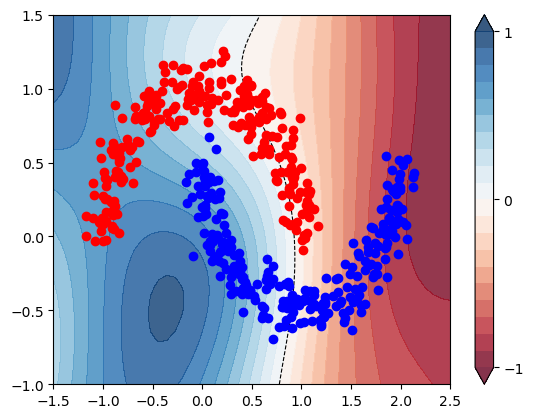

In [18]:
plt.figure()
cm = plt.cm.RdBu


xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 50), np.linspace(-1, 1.5, 50))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]

X_grid=procesdata(X_grid)

predictions_grid = [ Predictions(f, params, nqubits, nshots=nshots ) for f in X_grid]
Z1 = np.reshape(predictions_grid, xx.shape)


cnt = plt.contourf(
    xx, yy, Z1, levels=np.arange(-1, 1.1, 0.1), cmap=cm, alpha=0.8, extend="both"
)
plt.contour(
    xx, yy, Z1, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,)
)
plt.colorbar(cnt, ticks=[-1, 0, 1])

y2=[Predictions(
            ket,
            params,
            nqubits,
            nshots=nshots,
            
        ) for ket in X_pad]
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "ro")
plt.show()

<a id='Ejemplo'></a>
### 3.3.2 Data re-uploading

En esta sección enseñaremos como funciona el algoritmo de data re-uploading para classificar utilizando solo un qubit. Utilizaremos los mismos datos y el mismo preprocesamiento. Debemos modificar el circuito para implementar el algoritmo

In [41]:
def create_circuitd(w,x, nqubits= 2,nlayers=nlayers):
    
    c= Circuit(nqubits=nqubits)
    for i in range(nlayers):
        c.add(gates.RY(q=0, theta = x[0]+w[2*i]))
        c.add(gates.RZ(q=0, theta = x[1]+w[2*i+1]))
    
    c.add(gates.M(0))
    
    return c

In [18]:
def create_circuitd(w,x, nqubits= 2):
    
    c= Circuit(nqubits=nqubits)
    
#     c.add(gates.RY(q=0, theta = w[0]*x[0]+w[1]))
#     c.add(gates.RY(q=1, theta = w[2]*x[2]+w[3]))
    
#     c.add(gates.RZ(q=0, theta = w[4]*x[1]+w[5]))
#     c.add(gates.RZ(q=1, theta = w[6]*x[3]+w[7]))

#     c.add(gates.RY(q=0, theta = w[0]))
#     c.add(gates.RY(q=1, theta = w[1]))
    
#     c.add(gates.RZ(q=0, theta = w[2]))
#     c.add(gates.RZ(q=1, theta = w[3]))

    c.add(gates.RY(q=0, theta = x[0]+w[0]))
    c.add(gates.RZ(q=0, theta = x[1]+w[1]))
    
    # LAYER 1
    
    c.add(gates.RY(q=0, theta = x[0]+w[2]))
    c.add(gates.RZ(q=0, theta = x[1]+w[3]))
    
    # LAYER 2
    
    c.add(gates.RY(q=0, theta = x[0]+w[4]))
    c.add(gates.RZ(q=0, theta = x[1]+w[5]))
    
    # LAYER 3
    
    c.add(gates.RY(q=0, theta = x[0]+w[6]))
    c.add(gates.RZ(q=0, theta = x[1]+w[7]))
    
    c.add(gates.M(0))
    
    return c

In [19]:
 def Classifier_circuitd(theta,data,nqubits=2):
    """
    Args:
        theta: list or numpy.array with the biases and the angles to be used in the circuit
        nlayers: int number of layers of the varitional circuit ansatz
        RY: if True, parameterized Rx,Rz,Rx gates are used in the circuit
            if False, parameterized Ry gates are used in the circuit (default=False)
    Returns:
        Circuit implementing the variational ansatz for angles "theta"
    """
    circ = create_circuitd(theta,data, nqubits)
    return circ

In [20]:
nclasses=2
measured_qubits= int(np.ceil(np.log2(nclasses)))
nqubits=1
nlayers=3
nshots=10000

In [26]:
num_data = len(Y)
num_train = int(0.80 * num_data)
index = np.random.permutation(range(num_data))
X_pad2=np.pi*X_pad[:,[0,2]]
Y_train = Y[index[:num_train]]
Y_val = Y[index[num_train:]]
X_train = X_pad2[index[:num_train]]
X_val = X_pad2[index[num_train:]]

In [35]:
# Generar el dataset

# Some parameters
nqubits = 1
n_iter = 60

learning_rate = 0.25
batch_size = 5

np.random.seed(0)
#test_params = (np.pi* np.random.rand(2 * nqubits * nlayers  ))
test_params = np.random.normal(0,1,8)*np.pi


print('número de parámetros a ajustar:',len(test_params))
print('test_params_INI',test_params)


np.random.seed(123)

params = tf.Variable(test_params)
cost_all = Cost_function(params, X_pad2, Y,nqubits,R=True)

print('params',params)
print('cost_all',cost_all)

número de parámetros a ajustar: 8
test_params_INI [ 5.54193389  1.25713095  3.07479606  7.03997361  5.86710646 -3.07020901
  2.98479079 -0.47550269]
Loss:  2.0932352907442304 Acc:  0.286
params <tf.Variable 'Variable:0' shape=(8,) dtype=float64, numpy=
array([ 5.54193389,  1.25713095,  3.07479606,  7.03997361,  5.86710646,
       -3.07020901,  2.98479079, -0.47550269])>
cost_all tf.Tensor(2.0932352907442304, shape=(), dtype=float64)


In [36]:
from time import time

start_time = time()


# Generar el dataset

# Some parameters
nqubits = 1
n_iter = 20

learning_rate = 0.09
momentum = 4
batch_size = 5


for it in range(n_iter):  # Número máximo de iteraciones que hará el algoritmo.
    print('\nIteración',it)
    
#     batch_index = np.random.randint(0, len(X), (batch_size,))
# #     print('index',batch_index)
#     X_batch = X[batch_index]
#     Y_batch = Y[batch_index]
    
   
    # Calcular el gradiente:
    with tf.GradientTape() as tape:
        value_cost= Cost_function(params, X_train, Y_train, nqubits,R=True) 

#         print('LOSS en batch: ', value_cost.numpy(), 'ACC en batch: ', acc_cost)
    tf_grads = tape.gradient(value_cost, [params])
#     print ("tf_grad", tf_grads) 
    
    # Actualizar los parámetros:
    optimizer = getattr(tf.optimizers, "Adam")(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999,epsilon=1e-08)
    optimizer.apply_gradients(zip(tf_grads, [params]))
#     print('PARAMS actualizados: ', params)
    
    # Calcular coste con todos los datos y mirar precisión para criterio de parada.
    
#     print('LOSS all: ', cost_all.numpy(), 'ACC all: ', acc_all)

    if abs(cost_all-0.01) < 1e-2:
        break
cost_val = Cost_function(params, X_val, Y_val,nqubits,R=True)
cost_all = Cost_function(params, X_pad2, Y,nqubits,R=True)
        
tiempo_ej = time()-start_time
print('El tiempo que se ha tardado en ejecutar el algoritmo ha sido: ',tiempo_ej/60, 'minutos')


Iteración 0
Loss:  2.076941549801 Acc:  0.2925

Iteración 1
Loss:  1.8794511166983867 Acc:  0.325

Iteración 2
Loss:  1.6296885043904104 Acc:  0.415

Iteración 3
Loss:  1.3901290040065113 Acc:  0.5125

Iteración 4
Loss:  1.2044313157323452 Acc:  0.5825

Iteración 5
Loss:  1.086344406026617 Acc:  0.6375

Iteración 6
Loss:  1.0185279719612388 Acc:  0.6475

Iteración 7
Loss:  0.9647554455187175 Acc:  0.66

Iteración 8
Loss:  0.9048768547753978 Acc:  0.6775

Iteración 9
Loss:  0.8051674520761245 Acc:  0.6875

Iteración 10
Loss:  0.6755970396465559 Acc:  0.735

Iteración 11
Loss:  0.540730482244242 Acc:  0.7925

Iteración 12
Loss:  0.4171826468890671 Acc:  0.865

Iteración 13
Loss:  0.32552915945669175 Acc:  0.8975

Iteración 14
Loss:  0.2715231156293644 Acc:  0.93

Iteración 15
Loss:  0.240999478129064 Acc:  0.9425

Iteración 16
Loss:  0.2185976951642964 Acc:  0.9475

Iteración 17
Loss:  0.20566135555364393 Acc:  0.9525

Iteración 18
Loss:  0.19581367206342512 Acc:  0.9475

Iteración 19
L

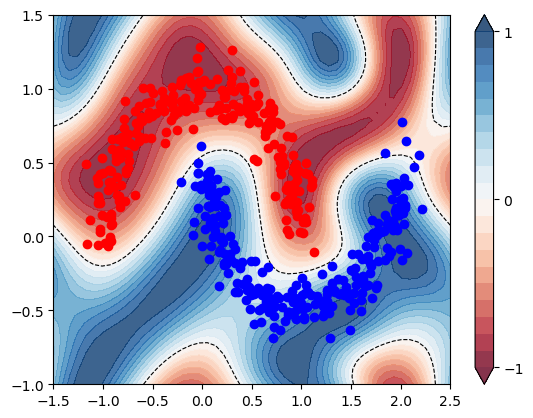

In [41]:
plt.figure()
cm = plt.cm.RdBu
paramsd=params

xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 50), np.linspace(-1, 1.5, 50))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]

X_grid=np.pi*procesdata(X_grid)[:,[0,2]]

predictions_grid = [
            Predictions(
            f,
            paramsd,
            nqubits,
            nshots=nshots,
            R=True
        ) for f in X_grid]
Z2 = np.reshape(predictions_grid, xx.shape)


cnt = plt.contourf(
    xx, yy, Z2, levels=np.arange(-1, 1.1, 0.1), cmap=cm, alpha=0.8, extend="both"
)
plt.contour(
    xx, yy, Z2, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,)
)
plt.colorbar(cnt, ticks=[-1, 0, 1])

y2=[Predictions(
            ket,
            paramsd,
            nqubits,
            nshots=nshots,
            R=True
        )
        for ket in X_pad2
    ]
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "ro")
plt.show()

Se generan los datos y los parámetros iniciales del circuito

Se generan los datos y los parámetros iniciales del circuito

Se generan los datos y los parámetros iniciales del circuito

<a id='notacion'></a>
<div class="alert alert-block alert-warning",text-align:center>
<b>ANEXO NOTACIÓN:</b>

Para que la comprensión de los notebooks sea mejor se ha unificado la notación utilizada en los mismos. Para diferenciar un vector de un valor único se hará uso de la negrita. De manera que $\mathbf{x}$ corresponde a un vector y $z$ será una variable de una única componente. 

    
Si se quiere hacer referencia a dos vectores distintos pero que pertenecen al mismo *dataset* se utilizará un subíndice, es decir, $\mathbf{x_i}$ hará referencia al i-ésimo vector del dataset. Si se quiere referenciar una característica concreta del vector $\mathbf{x_i}$ se añadirá un nuevo subíndice, de manera que $\mathbf{x_{i_j}}$ hará referencia a la j-ésima variable del i-ésimo vector.

</div>

---------------------------
## Referencias
<a id='referencias'></a>
[1]. https://born-2learn.github.io/posts/2020/12/variational-quantum-classifier/ <br>
[2]. https://pennylane.ai/qml/glossary/variational_circuit.html <br>
[3]. http://arxiv.org/abs/1907.02085 <br>
[4]. https://pennylane.ai/faq.html <br>
[5]. https://blog.tensorflow.org/2020/03/announcing-tensorflow-quantum-open.html<br>

This work has been financially supported by the Ministry of Economic Affairs and Digital Transformation of the Spanish Government through the QUANTUM ENIA project call - Quantum Spain project, and by the European Union through the Recovery, Transformation and Resilience Plan - NextGenerationEU within the framework of the Digital Spain 2025 Agenda.


<img align="left" src="https://quantumspain-project.es/wp-content/uploads/2022/11/LOGOS-GOB_QS.png" width="1000px" />